# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [12]:
import numpy as np
import sklearn
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits

In [71]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Importamos el dataset

In [3]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [4]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


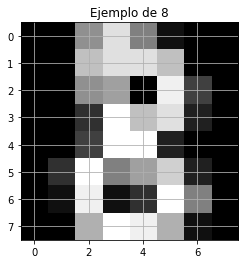

In [5]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

<IPython.core.display.Javascript object>


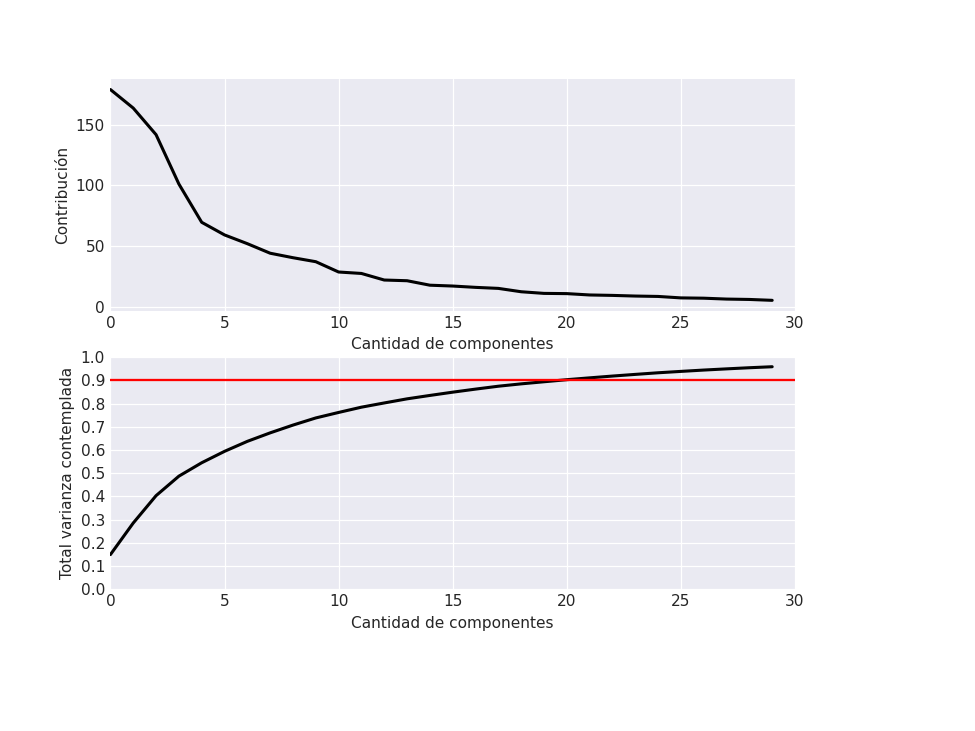

In [14]:
# Aplicamos PCA 
# Primero calculamos con 10 componentes y analizamos la contribución de cada componente
pca = PCA(n_components=30, random_state=0).fit(X)

#Graficamos scree plot y varianza acumulada
fig, axs = plt.subplots(2,figsize=(8,6))
axs[0].plot(pca.explained_variance_, color='k', lw=2)
axs[0].set_xlabel('Cantidad de componentes')
axs[0].set_ylabel('Contribución')
axs[0].set_xlim(0, 30)
axs[1].plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
axs[1].set_xlabel('Cantidad de componentes')
axs[1].set_ylabel('Total varianza contemplada')
axs[1].set_xlim(0, 30)
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].axhline(0.9, c='r')
plt.show();

In [15]:
# De la grafica anterior, el 90% de la varianza se explica con 20 componentes
pca = PCA(n_components=20, random_state=0).fit(X)

In [16]:
# Graficar 5 componentes - pendiente

<IPython.core.display.Javascript object>


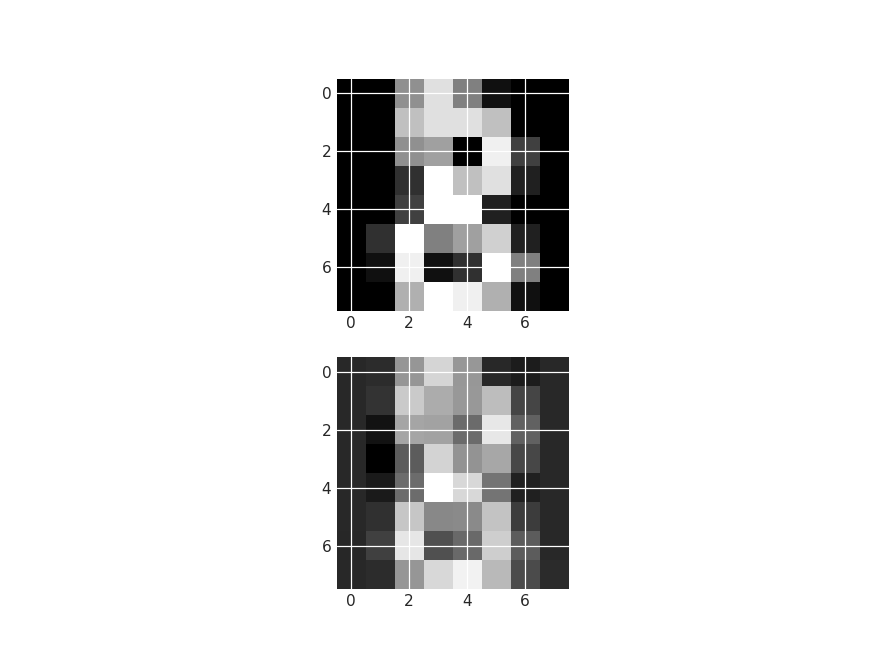

In [34]:
X_pca = pca.transform(X)
X_hat = pca.inverse_transform(X_pca)

#Graficamos la imagen original y la reconstruida para algun dígito
dig_idx=8
fig, axs = plt.subplots(2,figsize=(8,6))
axs[0].imshow(X[dig_idx, :].reshape((8, 8)), cmap='gray')
axs[1].imshow(X_hat[dig_idx, :].reshape((8, 8)), cmap='gray')

<IPython.core.display.Javascript object>


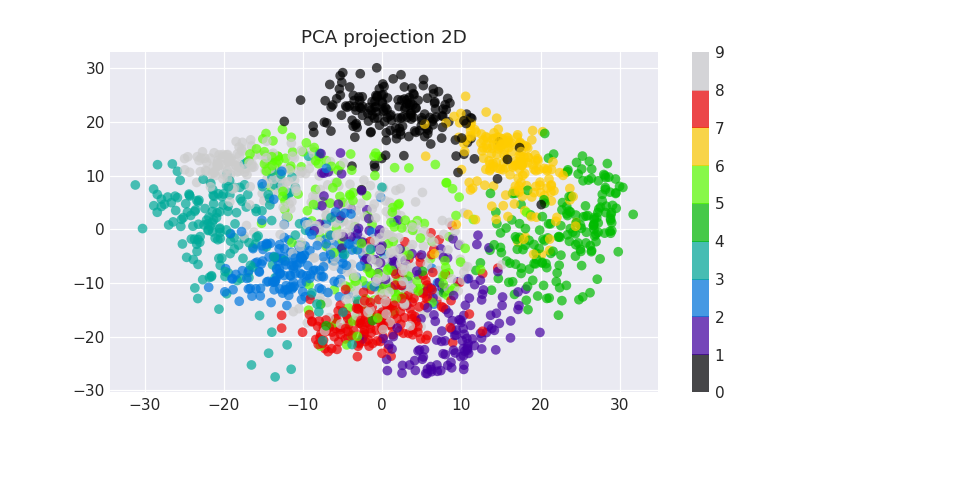

In [39]:
# Graficamos los clusters de digitos en 2 dimensiones usando las primeras dos componentes de PCA
plt.figure(1,figsize=(8,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none',\
            alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.colorbar()
plt.title('PCA projection 2D');

<IPython.core.display.Javascript object>


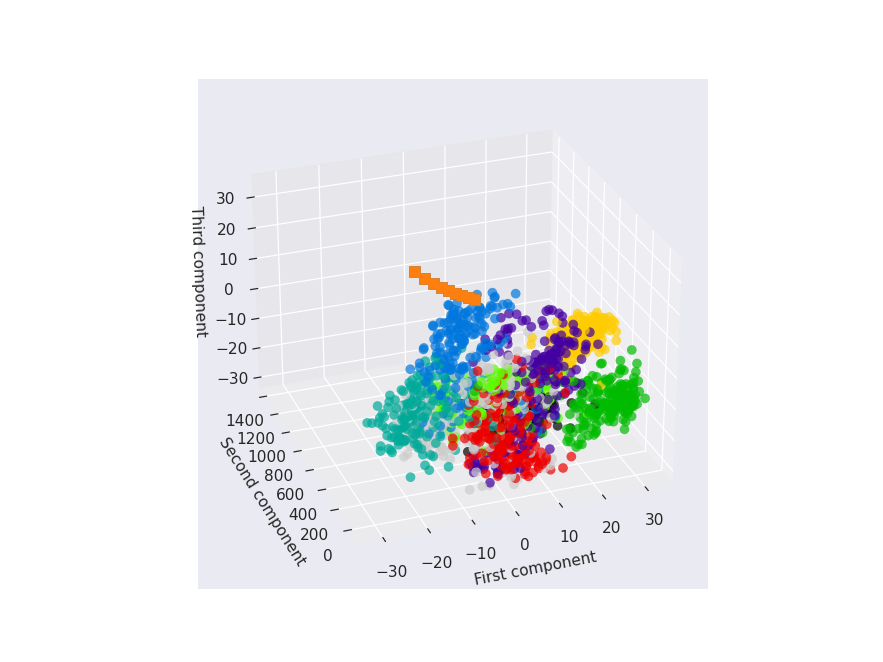

Text(0.5, 0, 'Third component')

In [40]:
# Graficamos los clusters de digitos en 3D usando las primeras tres componentes de PCA
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, edgecolor='none',\
            alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
ax.set_zlabel('Third component')

<IPython.core.display.Javascript object>


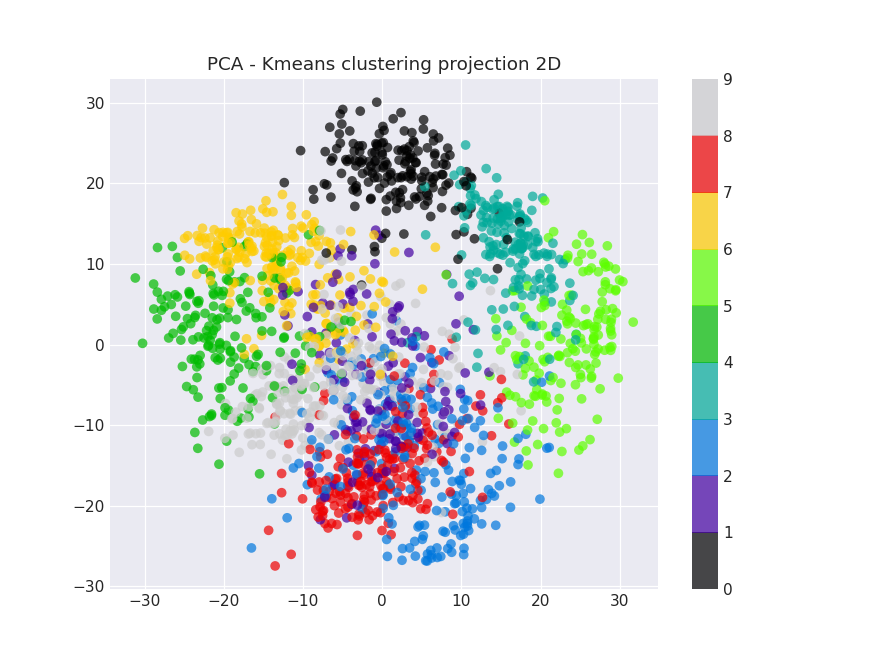

In [66]:
# Aplicamos clusterización con k-means utilizando 2 clusters
kmeans = KMeans(n_clusters=10, n_init=100, random_state=0)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Graficamos en 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', \
            alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 9))
plt.colorbar()
plt.title('PCA - Kmeans clustering projection 2D');

In [67]:
#Chequeamos resultados
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = [str(i + 0) for i in range(10)] + ['Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,177,0,0,0,0,1,0,0,0,0,178
1,0,1,99,2,1,0,0,0,24,55,182
2,1,0,8,0,12,0,2,3,149,2,177
3,0,2,7,0,155,0,11,7,1,0,183
4,0,0,3,0,0,163,0,9,0,6,181
5,0,136,0,1,0,2,43,0,0,0,182
6,1,0,2,177,0,0,0,0,0,1,181
7,0,0,2,0,0,0,0,175,0,2,179
8,0,4,101,2,3,0,49,6,3,6,174
9,0,5,2,0,6,0,139,8,0,20,180


In [68]:
#Debemos reordenar los clusters para una mejor visualización
cluster_labels[cluster_labels==0]=10
cluster_labels[cluster_labels==1]=11
cluster_labels[cluster_labels==2]=12
cluster_labels[cluster_labels==3]=13
cluster_labels[cluster_labels==4]=14
cluster_labels[cluster_labels==5]=15
cluster_labels[cluster_labels==6]=16
cluster_labels[cluster_labels==7]=17
cluster_labels[cluster_labels==8]=18
cluster_labels[cluster_labels==9]=19

cluster_labels[cluster_labels==10]=0
cluster_labels[cluster_labels==11]=5
cluster_labels[cluster_labels==12]=8
cluster_labels[cluster_labels==13]=6
cluster_labels[cluster_labels==14]=3
cluster_labels[cluster_labels==15]=4
cluster_labels[cluster_labels==16]=9
cluster_labels[cluster_labels==17]=7
cluster_labels[cluster_labels==18]=2
cluster_labels[cluster_labels==19]=1

In [69]:
#Chequeamos resultados
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = [str(i + 0) for i in range(10)] + ['Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,177,0,0,0,1,0,0,0,0,0,178
1,0,55,24,1,0,1,2,0,99,0,182
2,1,2,149,12,0,0,0,3,8,2,177
3,0,0,1,155,0,2,0,7,7,11,183
4,0,6,0,0,163,0,0,9,3,0,181
5,0,0,0,0,2,136,1,0,0,43,182
6,1,1,0,0,0,0,177,0,2,0,181
7,0,2,0,0,0,0,0,175,2,0,179
8,0,6,3,3,0,4,2,6,101,49,174
9,0,20,0,6,0,5,0,8,2,139,180


In [77]:
#Sacamos métricas numéricas
kmeans_precision=precision_score(y, cluster_labels,average='micro')
kmeans_recall=recall_score(y, cluster_labels,average='micro')
kmeans_accuracy=accuracy_score(y, cluster_labels)
kmeans_f1score=f1_score(y, cluster_labels,average='micro')

print("Precision: {:.2f}".format(kmeans_precision))
print("Recall: {:.2f}".format(kmeans_recall))
print("Accuracy: {:.2f}".format(kmeans_accuracy))
print("F1-Score: {:.2f}".format(kmeans_f1score))

Precision: 0.79
Recall: 0.79
Accuracy: 0.79
F1-Score: 0.79


In [84]:
#Grafico de inercia
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))
    

<IPython.core.display.Javascript object>


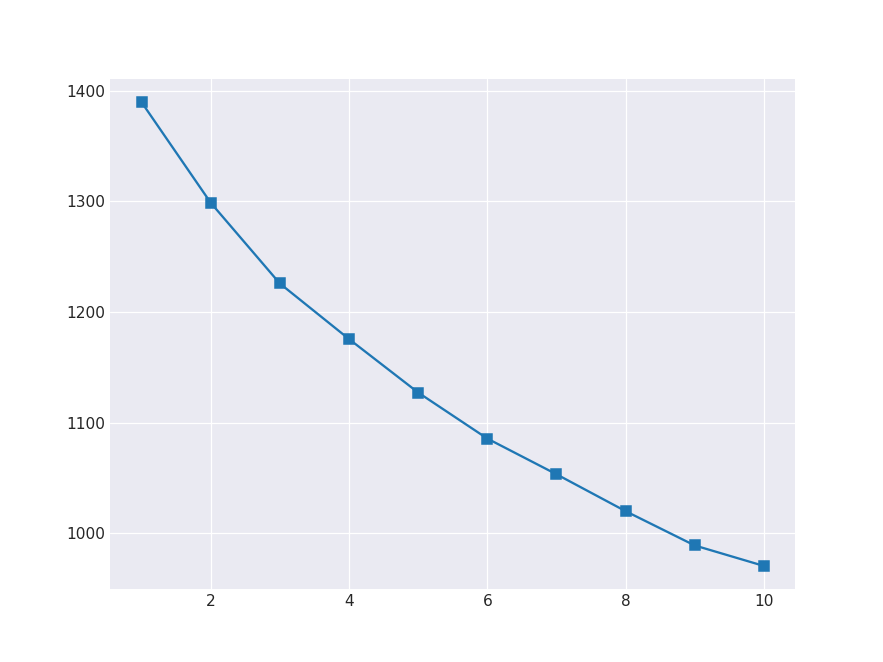

In [85]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='s')


In [88]:
d = {}
for k in range(2, 10):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

d

{2: 0.8030847275338141,
 3: 0.6880051894619128,
 4: 0.9628475670144652,
 5: 0.8604862213948429,
 6: 0.7755132624238832,
 7: 1.0343794265766695,
 8: 0.92896076578556,
 9: 0.5967836901092166}

In [97]:
# Generamos un digito artificialmente a partir del plot 2D. Generamos el dígito 0
X_artificial=np.zeros(shape=20)
X_artificial[1]=20

<IPython.core.display.Javascript object>


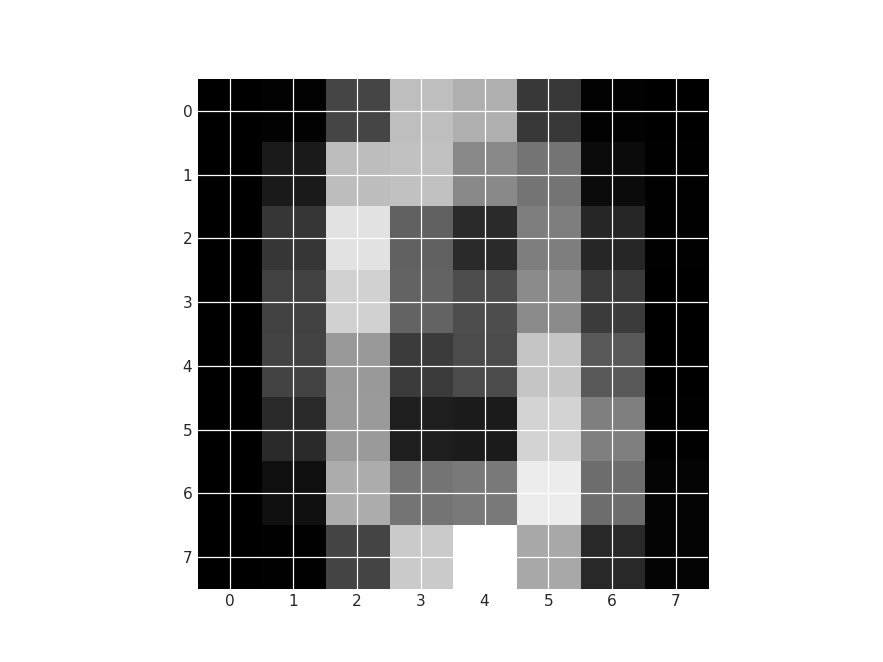

In [98]:
X_art_reconstructed = pca.inverse_transform(X_artificial)

plt.figure(figsize=(8,6))
plt.imshow(X_art_reconstructed.reshape((8, 8)), cmap='gray')